In [74]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [75]:
# Path to the JSONL file
WORDs = [
    "Acknowledgement",
    "Subdermatoglyphic",
    "tHyUiKaRbNqWeOpXcZvM",
]

index = 2
WORD = WORDs[index]

gt_data = pd.read_json(f"./images/{WORD}/configurations.json")

In [76]:
# text_image_0a5a0d82-477d-47e2-a504-861c5952fe98-gemini-output.md
gt_data["gemini-output-file"] = gt_data["image_path"].apply(
    lambda x: "./" + x.replace(".png", "") + "-gemini-output.md"
)

# Read the content of each file for the gemini output and make a new column, ignoring missing files
gt_data["gemini-output-raw"] = gt_data["gemini-output-file"].apply(
    lambda x: open(x, "r").read() if os.path.exists(x) else None
)

In [77]:
# drop rows with missing gemini output
gt_data = gt_data.dropna(subset=["gemini-output-raw"])
gt_data

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,gemini-output-file,gemini-output-raw
0,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,25,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_ed6c3...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_ed6...,The circled letter is **i**. \n
1,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,50,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_5ef73...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_5ef...,The letter **i** is circled. \n
2,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,100,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_8a15f...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8a1...,The letter **i** is circled. \n
3,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,200,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_494c5...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_494...,The letter **i** is circled. \n
4,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,5,1.4,25,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_1f6bd...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_1f6...,The letter **i** is being circled. \n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",9,5,1.4,200,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_024e3...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_024...,The letter **N** is circled. \n
140,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",9,6,1.4,25,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_e7ac9...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_e7a...,The letter **N** is circled. \n
141,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",9,6,1.4,50,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_a1441...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_a14...,The letter **N** is being circled. \n
142,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",9,6,1.4,100,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_27bad...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_27b...,The letter **N** is circled. \n


In [78]:
def extract_marked_text(text):
    # First try to extract text between **
    parts = text.split("**")
    if len(parts) > 1:
        return parts[1].lower()
    else:
        # If not found, try to extract text between "
        parts = text.split('"')
        if len(parts) > 1:
            return parts[1].lower()
        else:
            return "marker_not_found"


gt_data["predicted"] = gt_data["gemini-output-raw"].apply(extract_marked_text)

In [79]:
gt_data["predicted"].value_counts()

predicted
a            36
i            24
b            24
n            24
r            22
k             9
@             2
o             2
at symbol     1
Name: count, dtype: int64

In [80]:
cleaned_data = gt_data.copy()

In [81]:
cleaned_data["gt"] = cleaned_data.apply(
    lambda row: row["word"][row["circle_index"]].lower(), axis=1
)

In [82]:
cleaned_data.head()

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,gemini-output-file,gemini-output-raw,predicted,gt
0,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,25,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_ed6c3...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_ed6...,The circled letter is **i**. \n,i,i
1,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,50,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_5ef73...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_5ef...,The letter **i** is circled. \n,i,i
2,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,100,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_8a15f...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8a1...,The letter **i** is circled. \n,i,i
3,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,4,1.4,200,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_494c5...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_494...,The letter **i** is circled. \n,i,i
4,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,4,5,1.4,25,0,0,10,2,512,512,./images/tHyUiKaRbNqWeOpXcZvM/text_image_1f6bd...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_1f6...,The letter **i** is being circled. \n,i,i


In [83]:
cleaned_data["is_prediction_correct"] = cleaned_data["gt"] == cleaned_data["predicted"]
# get accuracy
accuracy = cleaned_data["is_prediction_correct"].mean()
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Overall Accuracy: 85.42%


In [84]:
len(cleaned_data)

144

In [85]:
errors = cleaned_data[cleaned_data["is_prediction_correct"] == False]
common_errors = (
    errors.groupby(["predicted", "gt"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
print(common_errors.head(10))

   predicted gt  count
1          a  k     15
0          @  a      2
2  at symbol  a      1
3          b  r      1
4          o  b      1
5          o  r      1


/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_69990/384443575.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_69990/384443575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_69990/384443575.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(list(WORD))
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_69990/384443575.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

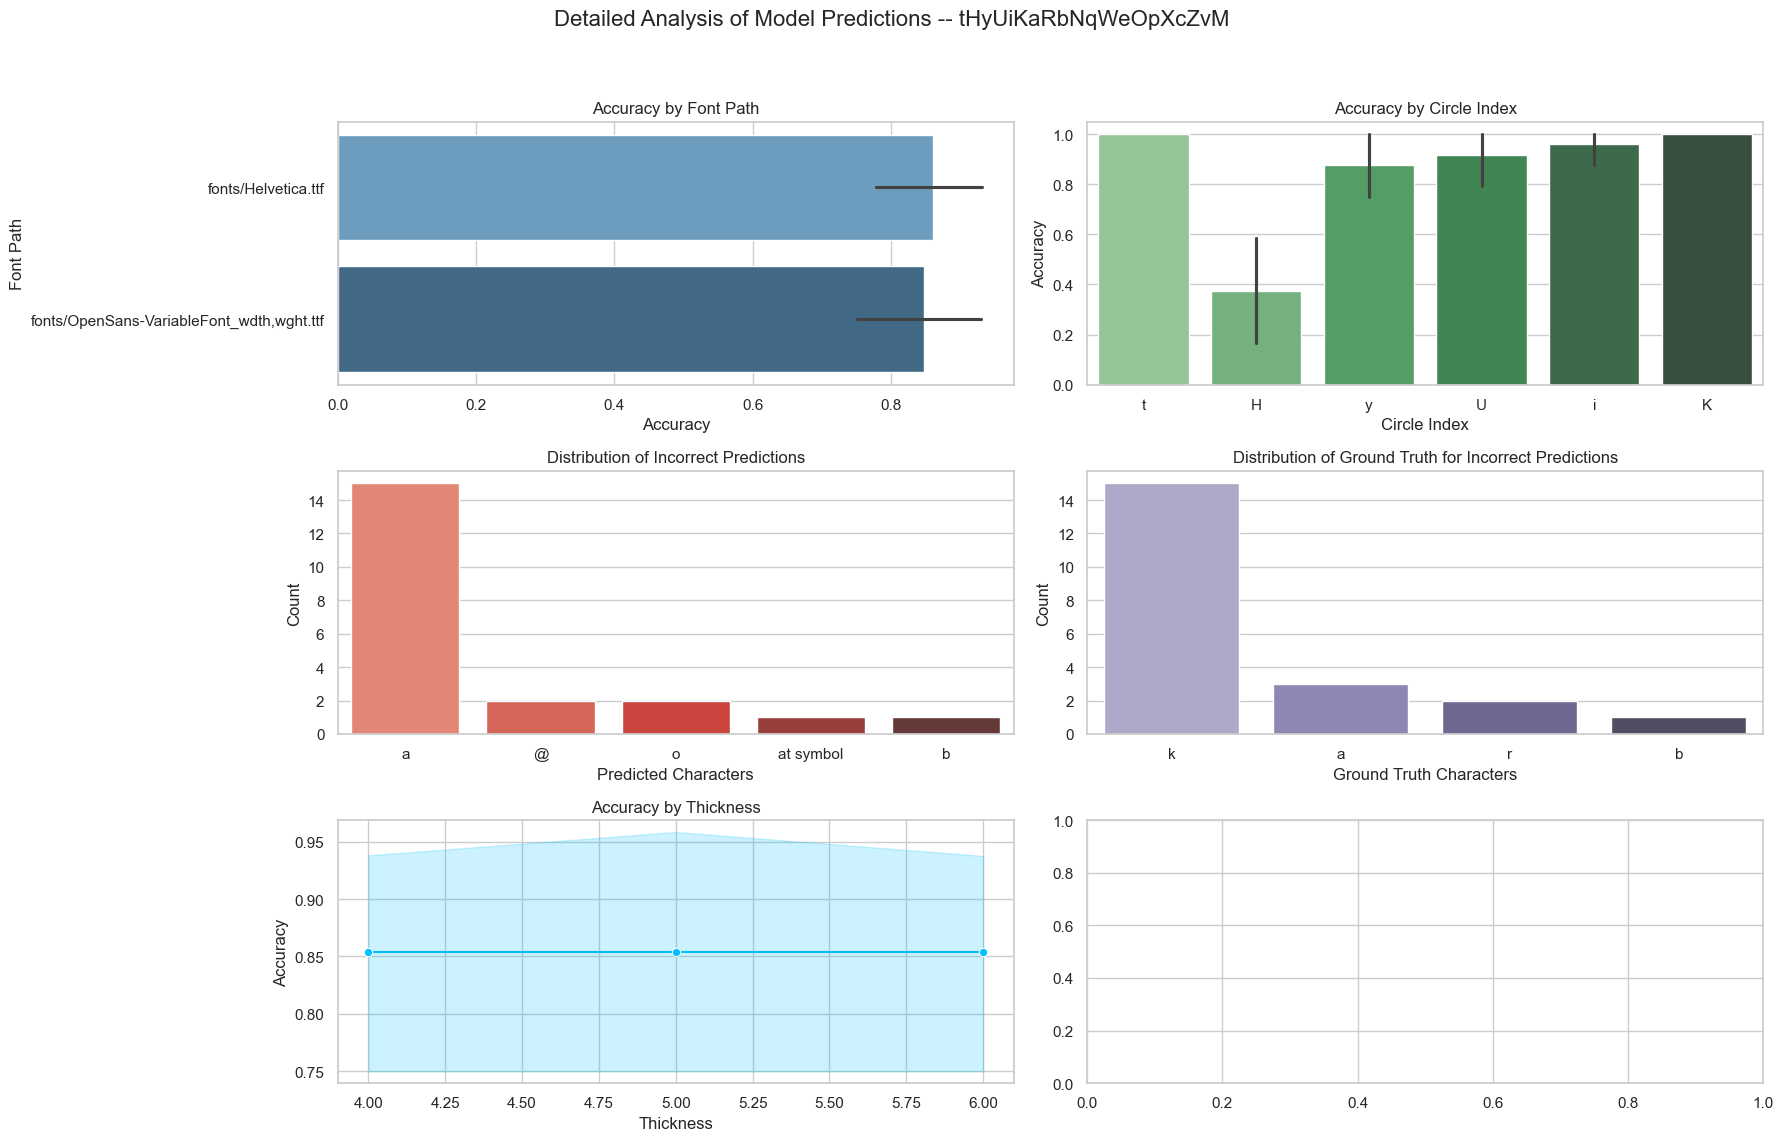

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with a more professional color palette and layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.suptitle(f"Detailed Analysis of Model Predictions -- {WORD}", fontsize=16)

# Customize the color palette
sns.set(style="whitegrid", palette="muted")

# Plot Accuracy by Font Path
sns.barplot(
    ax=axes[0, 0],
    x="is_prediction_correct",
    y="font_path",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    palette="Blues_d",
)
axes[0, 0].set_title("Accuracy by Font Path")
axes[0, 0].set_xlabel("Accuracy")
axes[0, 0].set_ylabel("Font Path")

# Plot Accuracy by Circle Index
sns.barplot(
    ax=axes[0, 1],
    x="circle_index",
    y="is_prediction_correct",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    palette="Greens_d",
)
axes[0, 1].set_title("Accuracy by Circle Index")
axes[0, 1].set_xlabel("Circle Index")
axes[0, 1].set_ylabel("Accuracy")
# Set x-axis labels to characters from the word
axes[0, 1].set_xticklabels(list(WORD))


# Plot Distribution of Incorrect Predictions
sns.countplot(
    ax=axes[1, 0],
    x="predicted",
    data=errors,
    order=errors["predicted"].value_counts().index,
    palette="Reds_d",
)
axes[1, 0].set_title("Distribution of Incorrect Predictions")
axes[1, 0].set_xlabel("Predicted Characters")
axes[1, 0].set_ylabel("Count")

# Plot Distribution of Ground Truth for Incorrect Predictions
sns.countplot(
    ax=axes[1, 1],
    x="gt",
    data=errors,
    order=errors["gt"].value_counts().index,
    palette="Purples_d",
)
axes[1, 1].set_title("Distribution of Ground Truth for Incorrect Predictions")
axes[1, 1].set_xlabel("Ground Truth Characters")
axes[1, 1].set_ylabel("Count")

# Plot Accuracy by Thickness
sns.lineplot(
    ax=axes[2, 0],
    x="thickness",
    y="is_prediction_correct",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    marker="o",
    color="deepskyblue",
)
axes[2, 0].set_title("Accuracy by Thickness")
axes[2, 0].set_xlabel("Thickness")
axes[2, 0].set_ylabel("Accuracy")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit into figure area.
plt.show()

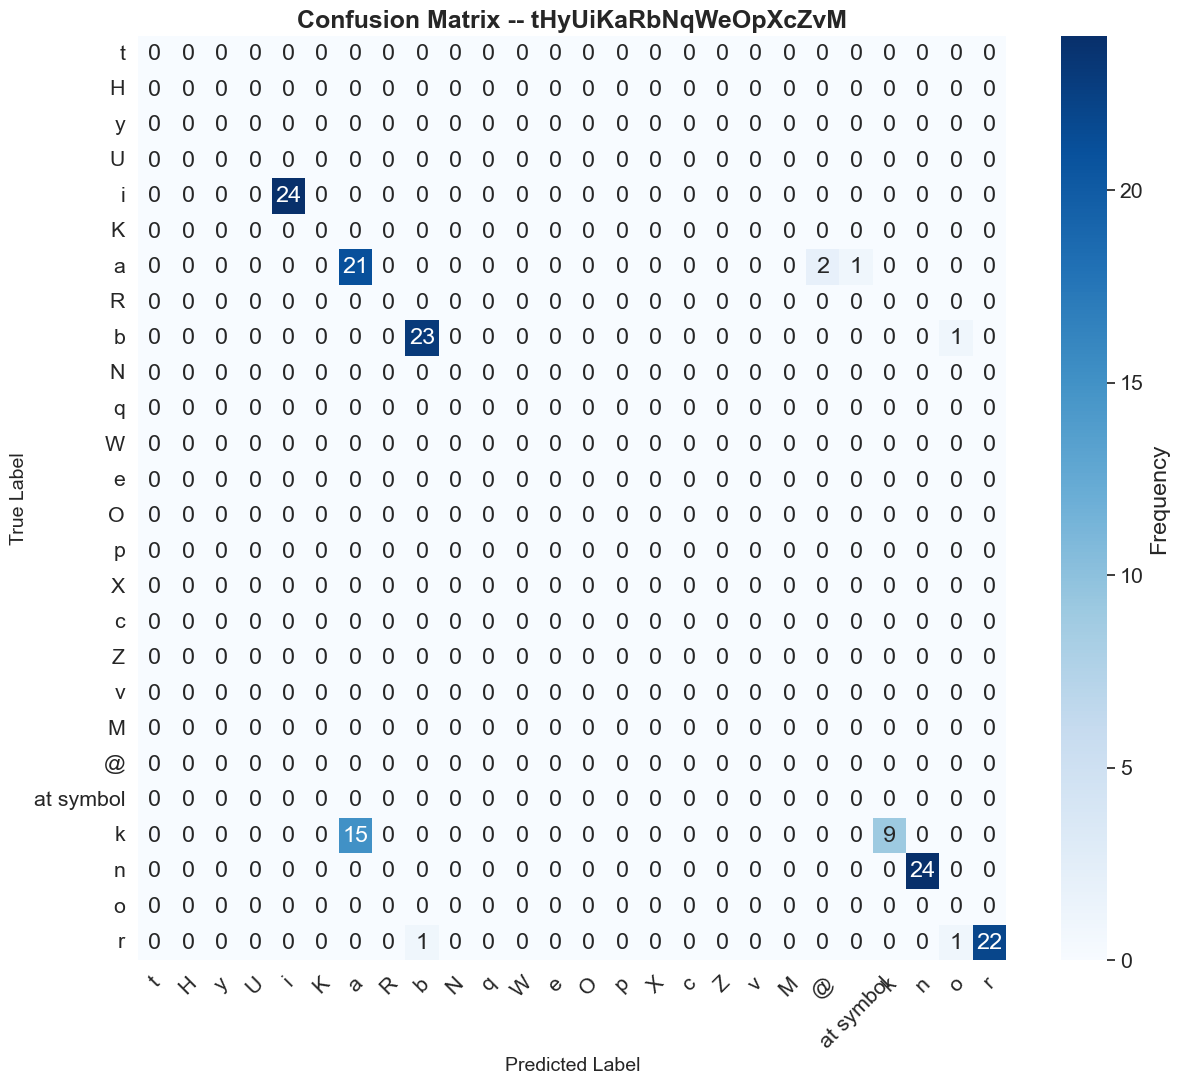

In [87]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract ground truth and predictions
ground_truth = cleaned_data["gt"]
predictions = cleaned_data["predicted"]

# Define the order of labels based on the word "Acknowledgement" and any extra characters
desired_order = list(WORD)  # Ensure it's in lowercase if your data is in lowercase
all_labels = np.unique(np.concatenate((ground_truth, predictions)))
extra_labels = [label for label in all_labels if label not in desired_order]
final_labels = desired_order + extra_labels

# Create the confusion matrix with the specified label order
conf_matrix = confusion_matrix(ground_truth, predictions, labels=final_labels)

# Plot the confusion matrix with a more professional appearance
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.4)  # Increase font size for readability
heatmap = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=final_labels,
    yticklabels=final_labels,
    cbar_kws={"label": "Frequency"},
)
plt.title(f"Confusion Matrix -- {WORD}", fontsize=18, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()